In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from pprint import pprint

# Import API key
from config import weatherPy_apiKey

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
print(weatherPy_apiKey)

54f6f5bb1a7c4610462289caa0693a66


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create an empty list to store JSON responses
response_json = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [5]:
# Build query URL
queryUrl = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weatherPy_apiKey + "&q="

In [6]:
# creating dataframe wtih test_cities
test_cities = ['acapulco', 'jamestown', 'dali', 'malatya', 'manila', 'pevek', 'cidreira']
responses = []
city_name = []
country_name = []
latitude = []
longitude = []
temperature = []
humidity = []
clouds = []
wind = []

index = 1
for city in cities:
    weather_data = requests.get(queryUrl + city).json()
    responses.append(weather_data)
    try:
        city_name.append(weather_data['name'])
        country_name.append(weather_data['sys']['country'])
        latitude.append(weather_data['coord']['lat'])
        longitude.append(weather_data['coord']['lon'])
        temperature.append(weather_data['main']['temp'])
        humidity.append(weather_data['main']['humidity'])
        clouds.append(weather_data['clouds']['all'])
        wind.append(weather_data['wind']['speed'])
        print(f'Record {index} | {city} found')
        index += 1
    except:
        print(f'Record {index} | **{city} not found**')
        index += 1
        pass

Record 1 | hukuntsi found
Record 2 | kodiak found
Record 3 | parakai found
Record 4 | cape town found
Record 5 | meiktila found
Record 6 | kongolo found
Record 7 | coihaique found
Record 8 | hirara found
Record 9 | jamestown found
Record 10 | caravelas found
Record 11 | bredasdorp found
Record 12 | namatanai found
Record 13 | rikitea found
Record 14 | arraial do cabo found
Record 15 | saint-philippe found
Record 16 | aysha found
Record 17 | faanui found
Record 18 | ostrovnoy found
Record 19 | pemangkat found
Record 20 | nishihara found
Record 21 | changji found
Record 22 | vaini found
Record 23 | chuy found
Record 24 | lyuban found
Record 25 | tambo found
Record 26 | bluff found
Record 27 | hobart found
Record 28 | marawi found
Record 29 | albany found
Record 30 | cockburn town found
Record 31 | saquena found
Record 32 | **barentsburg not found**
Record 33 | fereydunshahr found
Record 34 | punta arenas found
Record 35 | kapaa found
Record 36 | kirakira found
Record 37 | busselton found

Record 288 | nome found
Record 289 | chapais found
Record 290 | kenora found
Record 291 | sola found
Record 292 | dingle found
Record 293 | krasnoselkup found
Record 294 | iqaluit found
Record 295 | la asuncion found
Record 296 | saskylakh found
Record 297 | vardo found
Record 298 | palaikastron found
Record 299 | nagyoroszi found
Record 300 | saint-joseph found
Record 301 | vostok found
Record 302 | lyaskelya found
Record 303 | kaitangata found
Record 304 | smithers found
Record 305 | egvekinot found
Record 306 | lodeynoye pole found
Record 307 | karratha found
Record 308 | lodwar found
Record 309 | airai found
Record 310 | isaka found
Record 311 | kruisfontein found
Record 312 | **rungata not found**
Record 313 | **mergui not found**
Record 314 | port moresby found
Record 315 | narsaq found
Record 316 | kalat found
Record 317 | torremolinos found
Record 318 | **saleaula not found**
Record 319 | beloha found
Record 320 | sibu found
Record 321 | sergach found
Record 322 | roma found
Re

Record 571 | luzino found
Record 572 | baykit found
Record 573 | nara found
Record 574 | ust-kuyga found
Record 575 | krasnyy kholm found
Record 576 | nhulunbuy found
Record 577 | cabatuan found
Record 578 | **jujuy not found**
Record 579 | paarl found
Record 580 | east london found
Record 581 | north vanlaiphai found
Record 582 | solana beach found
Record 583 | mbaiki found
Record 584 | **urdzhar not found**
Record 585 | **solovetskiy not found**
Record 586 | bagaces found
Record 587 | abdanan found
Record 588 | **malwan not found**
Record 589 | lexington found
Record 590 | peresichna found
Record 591 | ismailia found
Record 592 | **mocambique not found**
Record 593 | moraresti found
Record 594 | bonthe found
Record 595 | ndele found
Record 596 | kitimat found
Record 597 | galle found
Record 598 | grants pass found
Record 599 | grand-lahou found
Record 600 | **mullaitivu not found**
Record 601 | cedar city found
Record 602 | gannavaram found
Record 603 | marathon found
Record 604 | ca

In [7]:
pprint(responses)

[{'base': 'stations',
  'clouds': {'all': 5},
  'cod': 200,
  'coord': {'lat': -24, 'lon': 21.75},
  'dt': 1617857476,
  'id': 933726,
  'main': {'feels_like': 289.72,
           'grnd_level': 896,
           'humidity': 61,
           'pressure': 1021,
           'sea_level': 1021,
           'temp': 290.35,
           'temp_max': 290.35,
           'temp_min': 290.35},
  'name': 'Hukuntsi',
  'sys': {'country': 'BW', 'sunrise': 1617857037, 'sunset': 1617899117},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 55, 'gust': 4.6, 'speed': 3.57}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 57.79, 'lon': -152.4072},
  'dt': 1617857720,
  'id': 5866583,
  'main': {'feels_like': 273.18,
           'humidity': 81,
           'pressure': 1005,
           'temp': 276.15,
           'temp_max': 276.15,
           't

               'main': 'Clouds'}],
  'wind': {'deg': 335, 'gust': 5.98, 'speed': 5.38}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 26.1842, 'lon': 127.7558},
  'dt': 1617857728,
  'id': 1855342,
  'main': {'feels_like': 296.75,
           'humidity': 49,
           'pressure': 1016,
           'temp': 297.03,
           'temp_max': 299.15,
           'temp_min': 296.15},
  'name': 'Nishihara',
  'sys': {'country': 'JP',
          'id': 8156,
          'sunrise': 1617829968,
          'sunset': 1617875314,
          'type': 1},
  'timezone': 32400,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 120, 'speed': 4.63}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 44.0167, 'lon': 87.3167},
  'dt': 1617857728,
  'id': 1529569,
  'main': {'feels_like': 285.75,
           'humidity': 44,
  

  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -10.4544, 'lon': 161.9205},
  'dt': 1617857734,
  'id': 2178753,
  'main': {'feels_like': 305.59,
           'grnd_level': 1004,
           'humidity': 73,
           'pressure': 1006,
           'sea_level': 1006,
           'temp': 301.78,
           'temp_max': 301.78,
           'temp_min': 301.78},
  'name': 'Kirakira',
  'sys': {'country': 'SB', 'sunrise': 1617822955, 'sunset': 1617865931},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 5, 'gust': 6.25, 'speed': 4.43}},
 {'base': 'stations',
  'clouds': {'all': 32},
  'cod': 200,
  'coord': {'lat': -33.65, 'lon': 115.3333},
  'dt': 1617857735,
  'id': 2075265,
  'main': {'feels_like': 291,
           'humidity': 71,
           'pressure': 1019,
           'temp': 291.28,
           'temp_max': 291.48,
           'temp_m

           'temp_min': 292.72},
  'name': 'Lüderitz',
  'sys': {'country': 'NA', 'sunrise': 1617858714, 'sunset': 1617900604},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 159, 'gust': 5.61, 'speed': 4.01}},
 {'base': 'stations',
  'clouds': {'all': 95},
  'cod': 200,
  'coord': {'lat': 72.7868, 'lon': -56.1549},
  'dt': 1617857739,
  'id': 3418910,
  'main': {'feels_like': 246.91,
           'grnd_level': 1028,
           'humidity': 72,
           'pressure': 1028,
           'sea_level': 1028,
           'temp': 253.89,
           'temp_max': 253.89,
           'temp_min': 253.89},
  'name': 'Upernavik',
  'sys': {'country': 'GL', 'sunrise': 1617868519, 'sunset': 1617925023},
  'timezone': -7200,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
              

               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 109, 'gust': 1.76, 'speed': 1.67}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 28.017, 'lon': -97.5169},
  'dt': 1617857747,
  'id': 4726521,
  'main': {'feels_like': 295.18,
           'humidity': 94,
           'pressure': 1011,
           'temp': 294.53,
           'temp_max': 295.15,
           'temp_min': 294.26},
  'name': 'San Patricio',
  'sys': {'country': 'US',
          'id': 3705,
          'sunrise': 1617797585,
          'sunset': 1617843041,
          'type': 1},
  'timezone': -18000,
  'visibility': 9656,
  'weather': [{'description': 'mist',
               'icon': '50n',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 150, 'speed': 3.09}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 5.4112, 'lon': 100.3354},
  'dt': 1617857747,
  'id': 1735106,
  'main': {'feels

  'name': 'Harper',
  'sys': {'country': 'LR', 'sunrise': 1617863212, 'sunset': 1617907084},
  'timezone': 0,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 233, 'gust': 2.49, 'speed': 2.4}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 55.1001, 'lon': -105.2842},
  'dt': 1617857753,
  'id': 6050066,
  'main': {'feels_like': 276.71,
           'humidity': 49,
           'pressure': 1002,
           'temp': 280.15,
           'temp_max': 280.15,
           'temp_min': 280.15},
  'name': 'La Ronge',
  'sys': {'country': 'CA',
          'id': 696,
          'sunrise': 1617797781,
          'sunset': 1617846573,
          'type': 1},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'win

           'temp_max': 278.82,
           'temp_min': 278.82},
  'name': "Ust'-Barguzin",
  'sys': {'country': 'RU', 'sunrise': 1617832859, 'sunset': 1617881433},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 276, 'gust': 1.54, 'speed': 1.96}},
 {'base': 'stations',
  'clouds': {'all': 94},
  'cod': 200,
  'coord': {'lat': 51.1631, 'lon': 54.9918},
  'dt': 1617857759,
  'id': 491019,
  'main': {'feels_like': 274.92,
           'grnd_level': 1004,
           'humidity': 92,
           'pressure': 1020,
           'sea_level': 1020,
           'temp': 277.13,
           'temp_max': 277.13,
           'temp_min': 277.13},
  'name': "Sol'-Iletsk",
  'sys': {'country': 'RU', 'sunrise': 1617846002, 'sunset': 1617894200},
  'timezone': 18000,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d'

          'type': 1},
  'timezone': -28800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 10, 'speed': 1.54}},
 {'base': 'stations',
  'clouds': {'all': 80},
  'cod': 200,
  'coord': {'lat': 9, 'lon': -71.9135},
  'dt': 1617857766,
  'id': 3628489,
  'main': {'feels_like': 298.44,
           'grnd_level': 1009,
           'humidity': 91,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 297.57,
           'temp_max': 297.57,
           'temp_min': 297.57},
  'name': 'San Carlos del Zulia',
  'sys': {'country': 'VE', 'sunrise': 1617878468, 'sunset': 1617922637},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 234, 'gust': 1.73, 'speed': 1.54}},
 {'base': 'stations',
  'clouds': {'all

  'wind': {'deg': 33, 'gust': 7.5, 'speed': 6.08}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 64.75, 'lon': 177.4833},
  'dt': 1617857774,
  'id': 2127202,
  'main': {'feels_like': 245.6,
           'humidity': 78,
           'pressure': 1036,
           'temp': 254.21,
           'temp_max': 254.26,
           'temp_min': 254.15},
  'name': 'Anadyr',
  'sys': {'country': 'RU',
          'id': 8872,
          'sunrise': 1617814945,
          'sunset': 1617866473,
          'type': 1},
  'timezone': 43200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 10, 'speed': 4}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 35.7333, 'lon': 140.8333},
  'dt': 1617857774,
  'id': 2112802,
  'main': {'feels_like': 288.64,
           'humidity': 55,
          

           'grnd_level': 1007,
           'humidity': 88,
           'pressure': 1009,
           'sea_level': 1009,
           'temp': 299.9,
           'temp_max': 299.9,
           'temp_min': 299.9},
  'name': 'Esim',
  'sys': {'country': 'GH', 'sunrise': 1617861883, 'sunset': 1617905785},
  'timezone': 0,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 218, 'gust': 5.47, 'speed': 3.33}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 69.4541, 'lon': -133.0374},
  'dt': 1617857785,
  'id': 6170031,
  'main': {'feels_like': 240.46,
           'humidity': 77,
           'pressure': 1022,
           'temp': 250.15,
           'temp_max': 250.15,
           'temp_min': 250.15},
  'name': 'Tuktoyaktuk',
  'sys': {'country': 'CA',
          'id': 942,
          'sunrise': 1617802005,
          'sunset': 1617855667,
          '

               'id': 601,
               'main': 'Snow'}],
  'wind': {'deg': 200, 'speed': 6.69}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -14.0958, 'lon': -46.6317},
  'dt': 1617857790,
  'id': 3461641,
  'main': {'feels_like': 293.69,
           'grnd_level': 948,
           'humidity': 95,
           'pressure': 1014,
           'sea_level': 1014,
           'temp': 293.15,
           'temp_max': 293.15,
           'temp_min': 293.15},
  'name': 'Iaciara',
  'rain': {'1h': 0.1198},
  'sys': {'country': 'BR', 'sunrise': 1617873123, 'sunset': 1617915849},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 192, 'gust': 4.26, 'speed': 1.65}},
 {'base': 'stations',
  'clouds': {'all': 67},
  'cod': 200,
  'coord': {'lat': 14.3, 'lon': -91.9167},
  'dt': 1617857791,
  'id': 3598787,
  'main': {'feels_like'

           'temp_min': 294.15},
  'name': 'Huntsville',
  'sys': {'country': 'US',
          'id': 4441,
          'sunrise': 1617794673,
          'sunset': 1617840707,
          'type': 1},
  'timezone': -18000,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 180, 'speed': 4.12}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 41.7597, 'lon': 86.1469},
  'dt': 1617857796,
  'id': 1529376,
  'main': {'feels_like': 286.99,
           'grnd_level': 914,
           'humidity': 33,
           'pressure': 1020,
           'sea_level': 1020,
           'temp': 288.53,
           'temp_max': 288.53,
           'temp_min': 288.53},
  'name': 'Korla',
  'rain': {'1h': 1.153},
  'sys': {'country': 'CN', 'sunrise': 1617839201, 'sunset': 1617886049},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'moderate

 {'base': 'stations',
  'clouds': {'all': 27},
  'cod': 200,
  'coord': {'lat': -34.0527, 'lon': 23.3716},
  'dt': 1617857806,
  'id': 964712,
  'main': {'feels_like': 289.24,
           'grnd_level': 1010,
           'humidity': 87,
           'pressure': 1020,
           'sea_level': 1020,
           'temp': 289.3,
           'temp_max': 289.3,
           'temp_min': 289.3},
  'name': 'Plettenberg Bay',
  'sys': {'country': 'ZA', 'sunrise': 1617857030, 'sunset': 1617898347},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 11, 'gust': 1.78, 'speed': 1.86}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 24.8247, 'lon': -107.5331},
  'dt': 1617857806,
  'id': 4012173,
  'main': {'feels_like': 292.54,
           'humidity': 78,
           'pressure': 1012,
           'temp': 292.51,
           'temp_max'

  'name': 'Tiksi',
  'sys': {'country': 'RU', 'sunrise': 1617824733, 'sunset': 1617880015},
  'timezone': 32400,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 92, 'gust': 1.95, 'speed': 1.86}},
 {'base': 'stations',
  'clouds': {'all': 11},
  'cod': 200,
  'coord': {'lat': 29.0331, 'lon': 21.5482},
  'dt': 1617857815,
  'id': 86049,
  'main': {'feels_like': 288.38,
           'grnd_level': 1012,
           'humidity': 32,
           'pressure': 1017,
           'sea_level': 1017,
           'temp': 289.82,
           'temp_max': 289.82,
           'temp_min': 289.82},
  'name': 'Jalu',
  'sys': {'country': 'LY', 'sunrise': 1617855322, 'sunset': 1617900929},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 83,

  'name': 'Mayo',
  'sys': {'country': 'US',
          'id': 5056,
          'sunrise': 1617878361,
          'sunset': 1617924951,
          'type': 1},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 120, 'speed': 4.12}},
 {'base': 'stations',
  'clouds': {'all': 72},
  'cod': 200,
  'coord': {'lat': -34.6515, 'lon': -59.4307},
  'dt': 1617857824,
  'id': 3430708,
  'main': {'feels_like': 295.13,
           'humidity': 80,
           'pressure': 1013,
           'temp': 294.82,
           'temp_max': 295.93,
           'temp_min': 293.71},
  'name': 'Mercedes',
  'sys': {'country': 'AR',
          'id': 2021774,
          'sunrise': 1617876938,
          'sunset': 1617918176,
          'type': 3},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
             

  'name': 'Cileunyi',
  'sys': {'country': 'ID',
          'id': 2039372,
          'sunrise': 1617835849,
          'sunset': 1617879033,
          'type': 3},
  'timezone': 25200,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 280, 'gust': 4.47, 'speed': 2.24}},
 {'base': 'stations',
  'clouds': {'all': 93},
  'cod': 200,
  'coord': {'lat': 64.434, 'lon': 76.5026},
  'dt': 1617857832,
  'id': 1539209,
  'main': {'feels_like': 264.79,
           'grnd_level': 1024,
           'humidity': 89,
           'pressure': 1030,
           'sea_level': 1030,
           'temp': 268.58,
           'temp_max': 268.58,
           'temp_min': 268.58},
  'name': 'Gubkinskiy',
  'sys': {'country': 'RU', 'sunrise': 1617839179, 'sunset': 1617890700},
  'timezone': 18000,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
 

  'cod': 200,
  'coord': {'lat': 49.8167, 'lon': -94.4337},
  'dt': 1617857838,
  'id': 5991056,
  'main': {'feels_like': 278.26,
           'humidity': 39,
           'pressure': 1013,
           'temp': 281.04,
           'temp_max': 281.15,
           'temp_min': 280.93},
  'name': 'Kenora',
  'sys': {'country': 'CA',
          'id': 894,
          'sunrise': 1617795650,
          'sunset': 1617843496,
          'type': 1},
  'timezone': -18000,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 50, 'speed': 4.63}},
 {'base': 'stations',
  'clouds': {'all': 26},
  'cod': 200,
  'coord': {'lat': -13.8833, 'lon': 167.55},
  'dt': 1617857838,
  'id': 2134814,
  'main': {'feels_like': 303.63,
           'grnd_level': 995,
           'humidity': 65,
           'pressure': 1007,
           'sea_level': 1007,
           'temp': 301.41,
           'temp_max': 301

 {'base': 'stations',
  'clouds': {'all': 33},
  'cod': 200,
  'coord': {'lat': -46.2817, 'lon': 169.8464},
  'dt': 1617857844,
  'id': 2208248,
  'main': {'feels_like': 288.2,
           'humidity': 72,
           'pressure': 1014,
           'temp': 288.71,
           'temp_max': 288.71,
           'temp_min': 288.71},
  'name': 'Kaitangata',
  'sys': {'country': 'NZ',
          'id': 2000217,
          'sunrise': 1617822446,
          'sunset': 1617862636,
          'type': 3},
  'timezone': 43200,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 270, 'gust': 9.39, 'speed': 6.71}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 54.7804, 'lon': -127.1743},
  'dt': 1617857580,
  'id': 6149996,
  'main': {'feels_like': 271.33,
           'humidity': 80,
           'pressure': 1011,
           'temp': 273.15,
           'te

  'timezone': 32400,
  'visibility': 157,
  'weather': [{'description': 'light snow',
               'icon': '13d',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 122, 'gust': 14.24, 'speed': 7.14}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -20.3428, 'lon': 57.7575},
  'dt': 1617857856,
  'id': 1106677,
  'main': {'feels_like': 304.75,
           'humidity': 83,
           'pressure': 1017,
           'temp': 300.78,
           'temp_max': 301.48,
           'temp_min': 300.15},
  'name': 'Bambous Virieux',
  'sys': {'country': 'MU',
          'id': 2061,
          'sunrise': 1617848269,
          'sunset': 1617890605,
          'type': 1},
  'timezone': 14400,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 60, 'speed': 5.14}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
 

  'cod': 200,
  'coord': {'lat': 25.3573, 'lon': 55.4033},
  'dt': 1617857868,
  'id': 292672,
  'main': {'feels_like': 293.26,
           'humidity': 100,
           'pressure': 1013,
           'temp': 292.64,
           'temp_max': 293.15,
           'temp_min': 292.15},
  'name': 'Sharjah city',
  'sys': {'country': 'AE',
          'id': 7545,
          'sunrise': 1617847353,
          'sunset': 1617892651,
          'type': 1},
  'timezone': 14400,
  'visibility': 1600,
  'weather': [{'description': 'mist',
               'icon': '50d',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 190, 'speed': 2.57}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': -5.5569, 'lon': -80.8222},
  'dt': 1617857869,
  'id': 3691954,
  'main': {'feels_like': 296.61,
           'grnd_level': 1011,
           'humidity': 71,
           'pressure': 1013,
           'sea_level': 1013,
           'temp': 296.38,
           'temp_max': 296.38,
 

  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 180, 'speed': 2.06}},
 {'base': 'stations',
  'clouds': {'all': 2},
  'cod': 200,
  'coord': {'lat': 24.0934, 'lon': 32.907},
  'dt': 1617857658,
  'id': 359792,
  'main': {'feels_like': 297.59,
           'grnd_level': 1000,
           'humidity': 11,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 298.69,
           'temp_max': 298.69,
           'temp_min': 298.69},
  'name': 'Aswān',
  'sys': {'country': 'EG', 'sunrise': 1617852797, 'sunset': 1617898003},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 6, 'gust': 4.99, 'speed': 3.36}},
 {'base': 'stations',
  'clouds': {'all': 92},
  'cod': 200,
  'coord': {'lat': 7.3833, 'lon': 8.5667},
  'dt': 1617857875,
  '

               'main': 'Rain'}],
  'wind': {'deg': 208, 'gust': 2.01, 'speed': 2.12}},
 {'base': 'stations',
  'clouds': {'all': 11},
  'cod': 200,
  'coord': {'lat': 3.7833, 'lon': 72.9667},
  'dt': 1617857880,
  'id': 1337605,
  'main': {'feels_like': 303.85,
           'grnd_level': 1012,
           'humidity': 71,
           'pressure': 1012,
           'sea_level': 1012,
           'temp': 301.1,
           'temp_max': 301.1,
           'temp_min': 301.1},
  'name': 'Mahibadhoo',
  'sys': {'country': 'MV', 'sunrise': 1617843872, 'sunset': 1617887704},
  'timezone': 18000,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 287, 'gust': 3.3, 'speed': 3.39}},
 {'base': 'stations',
  'clouds': {'all': 10},
  'cod': 200,
  'coord': {'lat': 18.8003, 'lon': 110.3967},
  'dt': 1617857880,
  'id': 1791779,
  'main': {'feels_like': 304.05,
           'grnd_level': 101

  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 21.4447, 'lon': -157.8378},
  'dt': 1617857891,
  'id': 5856516,
  'main': {'feels_like': 295.61,
           'humidity': 73,
           'pressure': 1017,
           'temp': 295.42,
           'temp_max': 297.15,
           'temp_min': 292.59},
  'name': '‘Āhuimanu',
  'sys': {'country': 'US',
          'id': 7877,
          'sunrise': 1617812301,
          'sunset': 1617857273,
          'type': 1},
  'timezone': -36000,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 50, 'speed': 7.2}},
 {'cod': '404', 'message': 'city not found'},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 24},
  'cod': 200,
  'coord': {'lat': -34.6534, 'lon': -58.6198},
  'dt': 1617857892,
  'id': 3430545,
  'main': {'feels_like': 297.5,
           'humidity': 75,
           'pressure':

          'sunrise': 1617799616,
          'sunset': 1617849783,
          'type': 1},
  'timezone': -21600,
  'visibility': 162,
  'weather': [{'description': 'light snow',
               'icon': '13n',
               'id': 600,
               'main': 'Snow'}],
  'wind': {'deg': 310, 'speed': 8.23}},
 {'base': 'stations',
  'clouds': {'all': 30},
  'cod': 200,
  'coord': {'lat': 61.95, 'lon': 159.2333},
  'dt': 1617857899,
  'id': 2125693,
  'main': {'feels_like': 264.96,
           'grnd_level': 1032,
           'humidity': 85,
           'pressure': 1035,
           'sea_level': 1035,
           'temp': 264.96,
           'temp_max': 264.96,
           'temp_min': 264.96},
  'name': 'Evensk',
  'sys': {'country': 'RU', 'sunrise': 1617819795, 'sunset': 1617870381},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 64, 'gust': 1.44, '

  'coord': {'lat': 53.2668, 'lon': -113.8187},
  'dt': 1617857906,
  'id': 5913601,
  'main': {'feels_like': 274.2,
           'humidity': 70,
           'pressure': 1004,
           'temp': 278.48,
           'temp_max': 279.15,
           'temp_min': 278.15},
  'name': 'Calmar',
  'sys': {'country': 'CA',
          'id': 639,
          'sunrise': 1617800002,
          'sunset': 1617848447,
          'type': 1},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 300, 'gust': 9.77, 'speed': 6.69}},
 {'base': 'stations',
  'clouds': {'all': 99},
  'cod': 200,
  'coord': {'lat': 66.8333, 'lon': 70.8333},
  'dt': 1617857907,
  'id': 1486321,
  'main': {'feels_like': 264.05,
           'grnd_level': 1029,
           'humidity': 96,
           'pressure': 1029,
           'sea_level': 1029,
           'temp': 268.17,
           'temp_max': 2

  'main': {'feels_like': 309.14,
           'grnd_level': 1009,
           'humidity': 52,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 305.72,
           'temp_max': 305.72,
           'temp_min': 305.72},
  'name': 'Langsa',
  'sys': {'country': 'ID', 'sunrise': 1617837852, 'sunset': 1617881725},
  'timezone': 25200,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 9, 'gust': 2.47, 'speed': 2.16}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 54.8097, 'lon': 105.1578},
  'dt': 1617857913,
  'id': 2012532,
  'main': {'feels_like': 272.84,
           'grnd_level': 972,
           'humidity': 96,
           'pressure': 1022,
           'sea_level': 1022,
           'temp': 276.26,
           'temp_max': 276.26,
           'temp_min': 276.26},
  '

               'main': 'Clouds'}],
  'wind': {'deg': 69, 'gust': 4.19, 'speed': 2.96}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 28.3667, 'lon': 129.4833},
  'dt': 1617857923,
  'id': 1855540,
  'main': {'feels_like': 294.79,
           'humidity': 53,
           'pressure': 1016,
           'temp': 295.15,
           'temp_max': 295.15,
           'temp_min': 295.15},
  'name': 'Naze',
  'sys': {'country': 'JP',
          'id': 8013,
          'sunrise': 1617829466,
          'sunset': 1617874987,
          'type': 1},
  'timezone': 32400,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 60, 'speed': 3.6}},
 {'base': 'stations',
  'clouds': {'all': 23},
  'cod': 200,
  'coord': {'lat': -45.8742, 'lon': 170.5036},
  'dt': 1617857877,
  'id': 2191562,
  'main': {'feels_like': 287.12,
           'humidity': 73,
          

           'temp_min': 298.71},
  'name': 'Angoche',
  'sys': {'country': 'MZ', 'sunrise': 1617852420, 'sunset': 1617895021},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 209, 'gust': 4.5, 'speed': 2.7}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 22.6783, 'lon': -3.9836},
  'dt': 1617857931,
  'id': 2450173,
  'main': {'feels_like': 297.11,
           'grnd_level': 996,
           'humidity': 12,
           'pressure': 1012,
           'sea_level': 1012,
           'temp': 298.23,
           'temp_max': 298.23,
           'temp_min': 298.23},
  'name': 'Taoudenni',
  'sys': {'country': 'ML', 'sunrise': 1617861699, 'sunset': 1617906805},
  'timezone': 0,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main':

           'humidity': 88,
           'pressure': 1012,
           'temp': 298.15,
           'temp_max': 298.15,
           'temp_min': 298.15},
  'name': 'Touros',
  'sys': {'country': 'BR',
          'id': 8452,
          'sunrise': 1617870164,
          'sunset': 1617913446,
          'type': 1},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 210, 'speed': 3.09}},
 {'cod': '404', 'message': 'city not found'},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 18},
  'cod': 200,
  'coord': {'lat': 61.3482, 'lon': 16.3946},
  'dt': 1617857939,
  'id': 2720679,
  'main': {'feels_like': 270.93,
           'humidity': 68,
           'pressure': 1006,
           'temp': 270.93,
           'temp_max': 270.93,
           'temp_min': 270.93},
  'name': 'Bollnäs',
  'sys': {'country': 'SE',
          'id': 

          'sunset': 1617850029,
          'type': 1},
  'timezone': -25200,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 340, 'speed': 3.09}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 48.9329, 'lon': -125.5528},
  'dt': 1617857652,
  'id': 6171633,
  'main': {'feels_like': 277.59,
           'humidity': 89,
           'pressure': 1016,
           'temp': 277.59,
           'temp_max': 277.59,
           'temp_min': 277.59},
  'name': 'Ucluelet',
  'sys': {'country': 'CA',
          'id': 19458,
          'sunrise': 1617803176,
          'sunset': 1617850904,
          'type': 3},
  'timezone': -25200,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 279, 'speed': 0.45}},
 {'base': 's

  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 360, 'speed': 3.09}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 10.8794, 'lon': 122.486},
  'dt': 1617857955,
  'id': 1721720,
  'main': {'feels_like': 307.27,
           'grnd_level': 1001,
           'humidity': 52,
           'pressure': 1008,
           'sea_level': 1008,
           'temp': 304.76,
           'temp_max': 304.76,
           'temp_min': 304.76},
  'name': 'Cabatuan',
  'sys': {'country': 'PH', 'sunrise': 1617831769, 'sunset': 1617876042},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 38, 'gust': 4.72, 'speed': 4.86}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  '

           'temp': 300.41,
           'temp_max': 300.41,
           'temp_min': 300.41},
  'name': 'Ndélé',
  'sys': {'country': 'CF', 'sunrise': 1617856280, 'sunset': 1617900404},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 185, 'gust': 4.5, 'speed': 0.84}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 54.0524, 'lon': -128.6534},
  'dt': 1617857962,
  'id': 5993072,
  'main': {'feels_like': 273.62,
           'humidity': 75,
           'pressure': 1013,
           'temp': 275.15,
           'temp_max': 275.15,
           'temp_min': 275.15},
  'name': 'Kitimat',
  'sys': {'country': 'CA',
          'id': 984,
          'sunrise': 1617803483,
          'sunset': 1617852085,
          'type': 1},
  'timezone': -25200,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
          

In [8]:
weather_df = pd.DataFrame({
    'City': city_name,
    'Country': country_name,
    'Lat': latitude,
    'Lng': longitude,
    'Temperature': temperature,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind (MPH)': wind
})

weather_df

,City,Country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Hukuntsi,BW,-24.0000,21.7500,290.35,61,5,3.57
1,Saint Paul Harbor,US,57.7900,-152.4072,276.15,81,75,3.09
2,Parakai,NZ,-36.6500,174.4333,293.59,71,84,1.34
3,Cape Town,ZA,-33.9258,18.4232,288.66,94,0,5.14
4,Meiktila,MM,20.8667,95.8667,308.20,28,0,4.86
...,...,...,...,...,...,...,...,...
539,Cedar City,US,37.6775,-113.0619,284.67,12,1,2.57
540,Gannavaram,IN,16.5333,80.8000,303.15,74,40,2.57
541,Marathon,US,44.9000,-89.7668,290.27,68,75,3.60
542,Cayambe,EC,0.0500,-78.1333,287.15,94,90,1.03


In [9]:
# function to convert 'Temperature' column from Kelvin to Farenheit
def Kelvin_to_Farenheit(kelvin):
    farenheit = (kelvin-273.15)*(9/5)+32
    return farenheit

In [10]:
weather_df['Temperature'] = Kelvin_to_Farenheit(weather_df['Temperature'])
weather_df

,City,Country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Hukuntsi,BW,-24.0000,21.7500,62.960,61,5,3.57
1,Saint Paul Harbor,US,57.7900,-152.4072,37.400,81,75,3.09
2,Parakai,NZ,-36.6500,174.4333,68.792,71,84,1.34
3,Cape Town,ZA,-33.9258,18.4232,59.918,94,0,5.14
4,Meiktila,MM,20.8667,95.8667,95.090,28,0,4.86
...,...,...,...,...,...,...,...,...
539,Cedar City,US,37.6775,-113.0619,52.736,12,1,2.57
540,Gannavaram,IN,16.5333,80.8000,86.000,74,40,2.57
541,Marathon,US,44.9000,-89.7668,62.816,68,75,3.60
542,Cayambe,EC,0.0500,-78.1333,57.200,94,90,1.03


In [11]:
weather_df.dtypes

City            object
Country         object
Lat            float64
Lng            float64
Temperature    float64
Humidity         int64
Cloudiness       int64
Wind (MPH)     float64
dtype: object

##### Analysis of 'Temperature (Farenheit) v. Latitude'

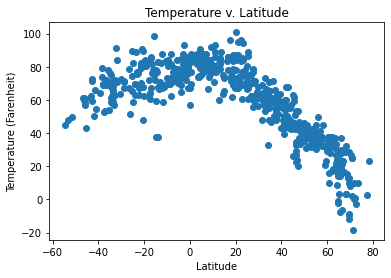

In [12]:
# Scatter Plot - Temperature (Farenheit) v. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
plt.savefig(f'visualizations/TempLat.png')
plt.show()

##### Analysis of 'Humidity (%) v. Latitude'


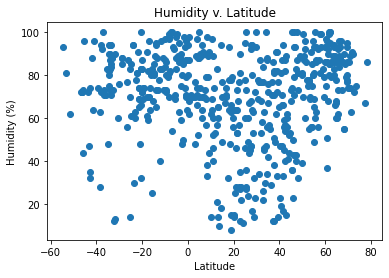

In [13]:
# Scatter Plot - Humidity (%) v. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig(f'visualizations/HumLat.png')
plt.show()

##### Analysis of 'Cloudiness(%) v. Latitude'


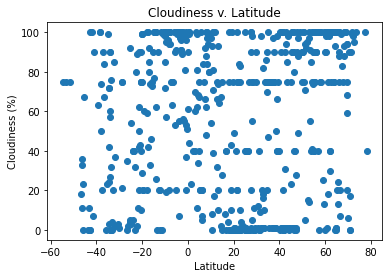

In [14]:
# Scatter Plot - Cloudiness (%) v. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig(f'visualizations/CloudLat.png')
plt.show()

##### Analysis of  'Wind Speed (mph) v. Latitude'


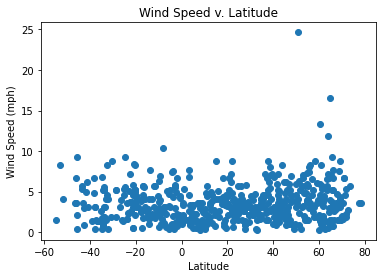

In [15]:
# Scatter Plot - Wind Speed (mph)) v. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig(f'visualizations/WindLat.png')
plt.show()

### Linear Regressions: Northern Hemisphere v. Southern Hemisphere

In [16]:
# Northern Hemisphere Data Frame
northWeather_df = weather_df.loc[(
    weather_df['Lat'] >= 0)]
northWeather_df

,City,Country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind (MPH)
1,Saint Paul Harbor,US,57.7900,-152.4072,37.400,81,75,3.09
4,Meiktila,MM,20.8667,95.8667,95.090,28,0,4.86
7,Hirara,JP,24.8000,125.2833,74.462,60,40,5.66
8,Jamestown,US,42.0970,-79.2353,54.608,59,1,4.63
15,Aysha,RU,55.8704,48.6319,35.600,87,90,8.00
...,...,...,...,...,...,...,...,...
539,Cedar City,US,37.6775,-113.0619,52.736,12,1,2.57
540,Gannavaram,IN,16.5333,80.8000,86.000,74,40,2.57
541,Marathon,US,44.9000,-89.7668,62.816,68,75,3.60
542,Cayambe,EC,0.0500,-78.1333,57.200,94,90,1.03


In [17]:
# Southern Hemisphere Data Frame
southWeather_df = weather_df.loc[(
    weather_df['Lat'] < 0)]
southWeather_df

,City,Country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Hukuntsi,BW,-24.0000,21.7500,62.960,61,5,3.57
2,Parakai,NZ,-36.6500,174.4333,68.792,71,84,1.34
3,Cape Town,ZA,-33.9258,18.4232,59.918,94,0,5.14
5,Kongolo,CD,-5.3833,27.0000,69.962,98,100,0.40
6,Coyhaique,CL,-45.5752,-72.0662,43.160,96,67,2.08
...,...,...,...,...,...,...,...,...
510,Mocuba,MZ,-16.8392,36.9856,67.208,96,85,1.80
511,Maamba,ZM,-17.3667,27.1500,64.112,82,42,0.55
520,Nhulunbuy,AU,-12.2333,136.7667,87.800,40,20,3.09
522,Paarl,ZA,-33.7338,18.9752,58.658,94,0,5.14


#### Temperature (Farenheit) Linear Regressions

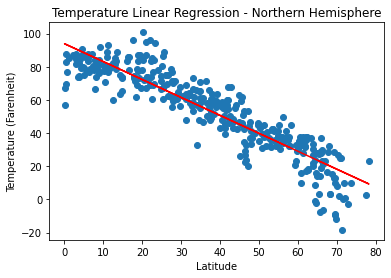

The r-value is: 0.8293432850393652


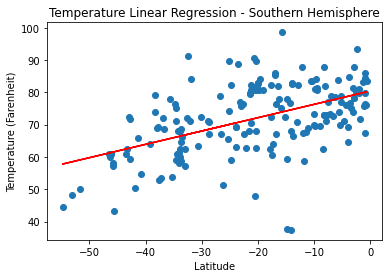

The r-value is: 0.266969069754993


In [18]:
# Linear Regression - Temperature (Farenheit) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Lat']
y_values = northWeather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/TempLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Temperature (Farenheit) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Lat']
y_values = southWeather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/TempLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Humidity (%) Linear Regressions

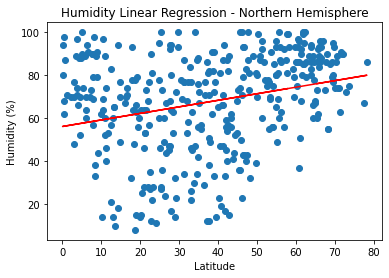

The r-value is: 0.07437282941349439


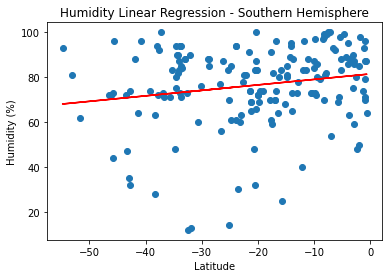

The r-value is: 0.03656655303176691


In [19]:
# Linear Regression - Humidity (%) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Lat']
y_values = northWeather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/HumLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Humidity (%) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Lat']
y_values = southWeather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/HumLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Cloudiness (%) Linear Regression

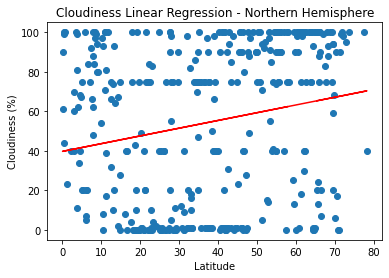

The r-value is: 0.0418032177378944


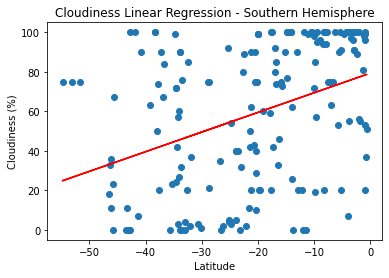

The r-value is: 0.14162111582006529


In [20]:
# Linear Regression - Cloudiness (%) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Lat']
y_values = northWeather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/CloudLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Cloudiness (%) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Lat']
y_values = southWeather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/CloudLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Wind Speed (mph) Linear Regressions

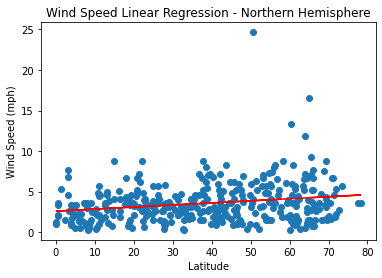

The r-value is: 0.045560416447037975


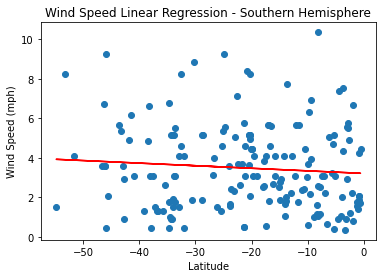

The r-value is: 0.007015072290038108


In [21]:
# Linear Regression - Wind Speed (mph) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Lat']
y_values = northWeather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/WindLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Wind Speed (mph) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Lat']
y_values = southWeather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/WindLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Save Data Frames as CSVs

In [22]:
# Weather Data Frame
weather_df_csv = weather_df.to_csv(index=False)
weatherData_csv = open("data/weather_df.csv", "w", encoding='utf-8')
weatherData_csv.write(weather_df_csv)
weatherData_csv.close()

In [23]:
# Northern Hemisphere - Weather Data Frame
northWeather_df_csv = northWeather_df.to_csv(index=False)
northWeatherData_csv = open("data/northWeather_df.csv", "w", encoding='utf-8')
northWeatherData_csv.write(northWeather_df_csv)
northWeatherData_csv.close()

In [24]:
# Southern Hemisphere - Weather Data Frame
southWeather_df_csv = southWeather_df.to_csv(index=False)
southWeatherData_csv = open("data/southWeather_df.csv", "w", encoding='utf-8')
southWeatherData_csv.write(southWeather_df_csv)
southWeatherData_csv.close()